# Importing Libraries

In [80]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\shivansh\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\shivansh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shivansh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import nltk
import re
import seaborn as sns
# Load the data to inspect its structure and contents
file_path = 'zomato_top_1000_integer_ratings_reviews.csv'
zomato_data = pd.read_csv(file_path)

# Display the first few rows to inspect
print(zomato_data.head())


   Rating                                             Review
0       1  Rice don't have gravy and I have ordered norma...
1       1                           proper packaging missing
2       3  Not consistent with taste...sometimes its too ...
3       5                     Amazing Service & Food Love it
4       1                                                NaN


# 1.Exploratory Data Analysis

### 1.1Preprocessing of data 

In [113]:
def remove_non_english(text):
    if pd.isnull(text):  # Check for NaN values
        return text
    # Keep only English letters, numbers, punctuation, and spaces
    return re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)

# Apply the function to the 'Review' column
zomato_data['Review'] = zomato_data['Review'].apply(remove_non_english)

### 1.2 Firstly we delpoy descriptive stats

In [114]:
zomato_data.shape

(1000, 2)

In [115]:
zomato_data['Rating'].isnull().any()


False

In [116]:
zomato_data['Review'].isnull().any()
zomato_data['Review'].isnull().sum()


429

##### 1.1.1 Analysis:

###### Data has 1000 rows 2 columns

###### Ratings columnn does not has any null values

###### Review column has null values

###### This data has 42% null values

In [117]:
zomato_data['Rating'].describe()

count    1000.000000
mean        2.853000
std         1.825575
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

###### This average is skewed towards the middle, suggesting that customers are not highly satisfied overall, as a rating of 3 is often seen as neutral.

In [118]:
filtered_data = zomato_data[zomato_data['Rating'] != 3]

# Calculate the average rating excluding 3-star ratings
average_rating_excluding_3 = filtered_data['Rating'].mean()

print("Average rating excluding 3-star ratings:", average_rating_excluding_3)

Average rating excluding 3-star ratings: 2.842443729903537


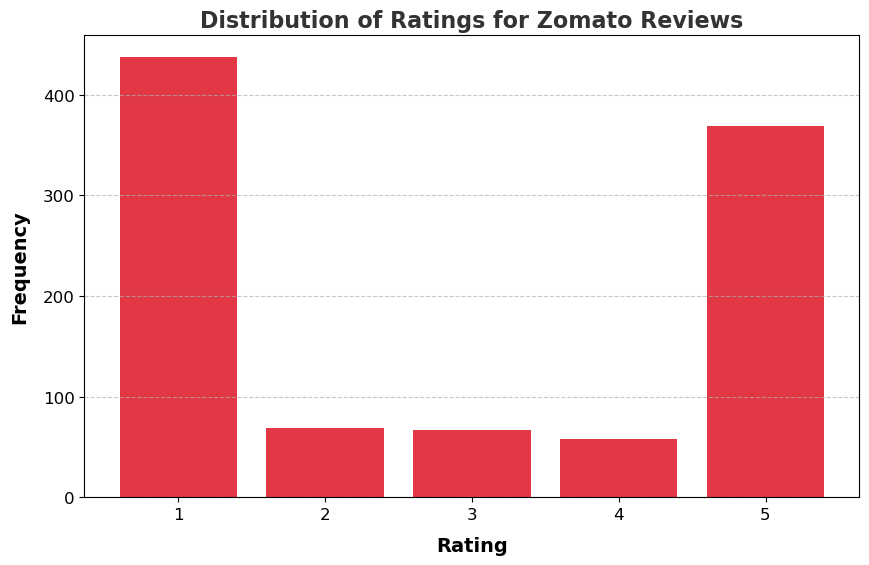

In [119]:
rating_counts = zomato_data['Rating'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values, color='#E23744')  # Zomato's logo color

# Add labels and title with professional styling
plt.xlabel('Rating', fontsize=14, labelpad=10, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, labelpad=10, fontweight='bold')
plt.title('Distribution of Ratings for Zomato Reviews', fontsize=16, fontweight='bold', color='#333333')
plt.xticks(rating_counts.index, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

## 1.1 Analysis:
Given that removing 3-star ratings does not shift the average significantly, it’s likely that customer experiences are polarized, with many customers having negative experiences rather than neutral ones.

### 1.2 Text analysis

In [120]:
example=zomato_data['Review'][110]
print(example)

Its really awsm as always. Outlet employees are very proactive about their customer choice. They called me and asked everything before they started making food. Thank you for the lovely food


In [121]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['Its',
 'really',
 'awsm',
 'as',
 'always',
 '.',
 'Outlet',
 'employees',
 'are',
 'very']

In [122]:
tags=nltk.pos_tag(tokens)

In [123]:
entities=nltk.chunk.ne_chunk(tags)
entities.pprint()

(S
  Its/PRP$
  really/RB
  awsm/JJ
  as/IN
  always/RB
  ./.
  Outlet/CC
  employees/NNS
  are/VBP
  very/RB
  proactive/JJ
  about/IN
  their/PRP$
  customer/NN
  choice/NN
  ./.
  They/PRP
  called/VBD
  me/PRP
  and/CC
  asked/VBD
  everything/NN
  before/IN
  they/PRP
  started/VBD
  making/VBG
  food/NN
  ./.
  Thank/NNP
  you/PRP
  for/IN
  the/DT
  lovely/JJ
  food/NN)


In [124]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia= SentimentIntensityAnalyzer()
sia.polarity_scores('I am so happy! in my dream')

{'neg': 0.0, 'neu': 0.389, 'pos': 0.611, 'compound': 0.7419}

### 1.2.1 Topics with maximum frequency

In [125]:
from nltk.corpus import stopwords
from collections import Counter
text_data = zomato_data['Review'].dropna().tolist()  # Replace `zomato_data` with your DataFrame name

# Combine all text into a single string
all_text = ' '.join(text_data)

# Tokenize the text
tokens = nltk.word_tokenize(all_text)

# Convert to lowercase and filter out stopwords and non-alphabetic tokens
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_tokens)

# Create a DataFrame with words and their frequencies
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the top 10 most frequent words
print(word_freq_df.head(10))

      Word  Frequency
0  chicken        131
1     food         99
2     good         77
3    order         58
4  quality         49
5      bad         48
6      kfc         47
7     cold         40
8     rice         37
9  missing         33


###### Analysis:
If "chicken" has a frequency of 131, it means that the word "chicken" appears 131 times across all the reviews, regardless of how many individual reviews contain the word.
The term "cold" suggests that customers often mention receiving cold food, which is usually a negative indicator for a food delivery service.
The word "missing" suggests that missing items in orders is a recurring issue, likely leading to customer dissatisfaction.


### 1.2.2 Polarity scores

In [126]:
def calculate_polarity(review):
    if pd.isnull(review):
        return None
    return sia.polarity_scores(review)['compound']

# Apply the function to the 'Review' column to get polarity scores
zomato_data['Polarity'] = zomato_data['Review'].apply(calculate_polarity)

# Filter out rows with no polarity scores (i.e., no review)
filtered_data = zomato_data.dropna(subset=['Polarity'])

# Display the first few rows with polarity scores
print(filtered_data[['Review', 'Polarity']].head())

# Optional: Save the results to a new CSV file for further analysis
filtered_data.to_csv('zomato_reviews_with_sentiment.csv', index=False)

                                              Review  Polarity
0  Rice dont have gravy and I have ordered normal...   -0.6798
1                           proper packaging missing   -0.2960
2  Not consistent with taste...sometimes its too ...    0.2732
3                      Amazing Service  Food Love it    0.8402
5    i ordered pepsi can but restaurant not provided    0.0000


##### Analysis:
- Polarity score lies between -1 and 1:
  - **-1**: Strongly negative sentiment
  - **0**: Neutral sentiment (no clear positive or negative tone)
  - **+1**: Strongly positive sentiment

### 1.2.2.3 Polarity analysis

Mean Polarity: -0.05253047285464097
Median Polarity: 0.0
Standard Deviation of Polarity: 0.4160097488942298

Sentiment Distribution:
 Sentiment
Negative    217
Neutral     204
Positive    150
Name: count, dtype: int64


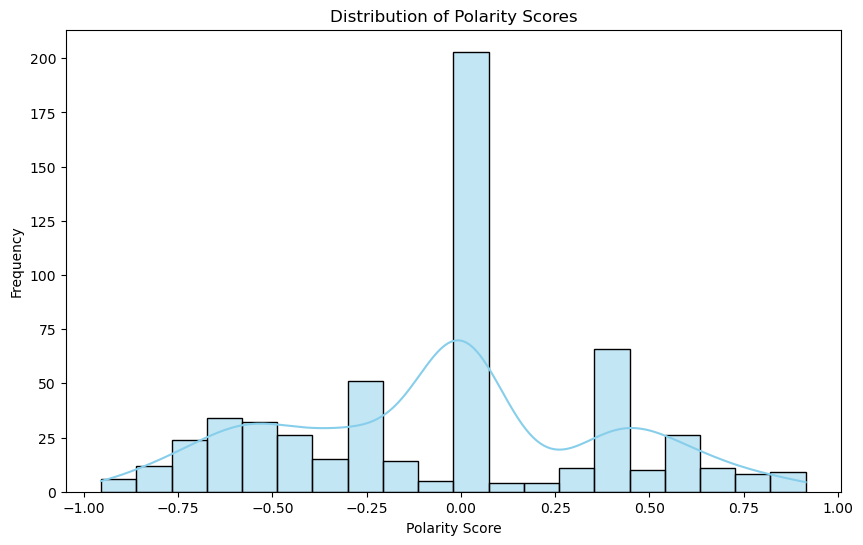

C:\Users\shivansh\AppData\Local\Temp\ipykernel_12972\1569845907.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=filtered_data, palette='coolwarm')


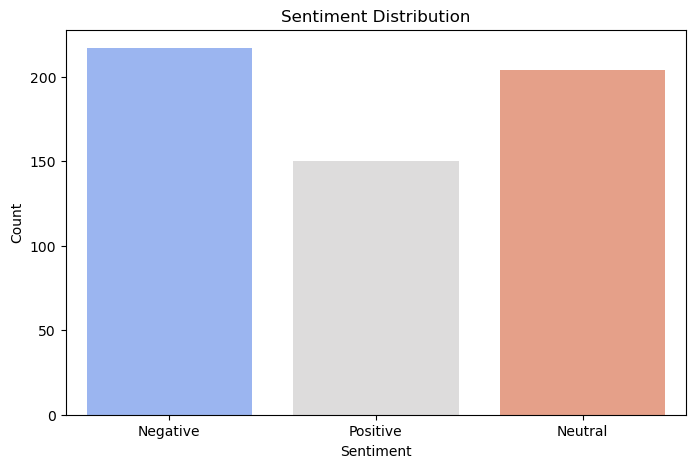


Correlation between Rating and Polarity Score: 0.6528887995204626


In [133]:
mean_polarity = filtered_data['Polarity'].mean()
median_polarity = filtered_data['Polarity'].median()
std_polarity = filtered_data['Polarity'].std()

print(f"Mean Polarity: {mean_polarity}")
print(f"Median Polarity: {median_polarity}")
print(f"Standard Deviation of Polarity: {std_polarity}")

# Classify sentiment based on polarity score
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Use .loc to add the 'Sentiment' column without triggering SettingWithCopyWarning
filtered_data.loc[:, 'Sentiment'] = filtered_data['Polarity'].apply(classify_sentiment)

# Count the number of positive, neutral, and negative reviews
sentiment_counts = filtered_data['Sentiment'].value_counts()
print("\nSentiment Distribution:\n", sentiment_counts)

# Visualize the distribution of polarity scores
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Polarity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

# Visualize the count of positive, neutral, and negative reviews
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=filtered_data, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Optional: If there is a rating column, analyze the correlation with polarity score
if 'Rating' in filtered_data.columns:
    correlation = filtered_data['Rating'].corr(filtered_data['Polarity'])
    print("\nCorrelation between Rating and Polarity Score:", correlation)

##### Analysis:
A mean polarity of -0.05 is close to zero but slightly negative. This suggests that, on average, the overall sentiment is mildly negative.
Since the mean is negative, it implies that there might be more dissatisfaction or complaints in the reviews, though the negative sentiment isn’t very strong.